In [168]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import re
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [169]:
#Load Data
df= pd.read_csv('contestants.csv')


In [170]:
# Clean Data
# Seperate hometown into City and State to see most common States 
df['CITY'], df['STATE'] = df['Hometown'].str.split(',', 2).str[0:2].str

#Winner variable
winner = df[df['Together'].notnull()]
losers= df[df['Together'].isnull()]

Part 1- Data Exploration- Characterizing Bachelor Contestants

Mean age of Bachelor Contestant: 26.334719334719335
Oldest Contestant 36.0
Youngest Contestant 21.0


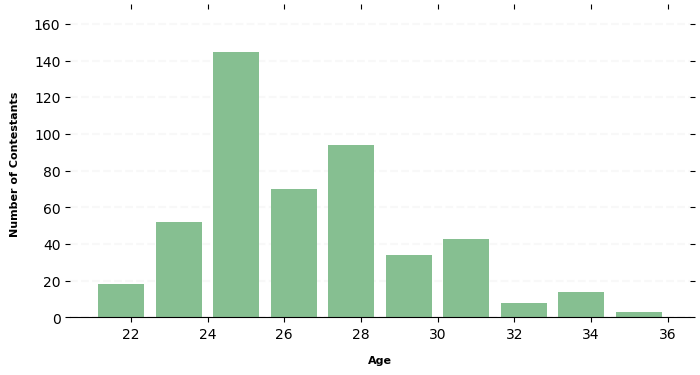

In [178]:
# Average Age of Bachelor Contestants
print("Mean age of Bachelor Contestant:", df['Age'].mean())
print("Oldest Contestant",df['Age'].max())
print("Youngest Contestant",df['Age'].min())

ax = df.hist(column='Age', bins=10, grid=False, figsize=(8,4), color='#86bf91', zorder=2, rwidth=0.8)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Age", labelpad=10, weight='bold', size=8)

    # Set y-axis label
    x.set_ylabel("Number of Contestants", labelpad=10, weight='bold', size=8)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [172]:
df['STATE'].value_counts()[0:10]

 California        77
 Texas             36
 Florida           36
 Illinois          27
 New York          17
 Utah              13
 New Jersey        13
 Colorado          13
 Pennsylvania      12
 North Carolina    12
Name: STATE, dtype: int64

In [173]:
df['CITY'].value_counts()[0:10]

Dallas            11
Los Angeles        8
Chicago            7
Seattle            7
Salt Lake City     6
Miami              6
Tampa              6
San Diego          6
Houston            5
New York           5
Name: CITY, dtype: int64

In [174]:
df['Occupation'].value_counts()[0:10]

Attorney             13
Realtor               9
Model                 8
Nanny                 8
Student               7
Teacher               7
Flight Attendant      7
Waitress              6
Account Executive     5
Actress               5
Name: Occupation, dtype: int64

In [196]:
# 439 white contestants and only 43 minority contestants
df['Minority'].value_counts()
df2= df.copy()
df2['Minority'] = df2['Minority'].replace(0,'Not Minority')
df2['Minority'] = df2['Minority'].replace(1,'Minority')
#ax = df2[['Minority']].plot(kind='bar')
#sns.barplot(x='Minority', y='', data=df2)
df

,Unnamed: 0,Age,Elimination_Week,Hometown,Name,Occupation,Outcome,Season,First_Impression_Rose,Villain Edit,Minority,Together,CITY,STATE
0,0,23.0,Winner,"Chanute, Kansas",Amanda Marsh,Event Planner,NaN,1,NaN,NaN,0,0.0,Chanute,Kansas
1,1,29.0,Runner-up,"Miami, Florida",Trista Rehn,Miami Heat Dancer,NaN,1,NaN,NaN,0,NaN,Miami,Florida
2,2,24.0,5,"Dallas, Texas",Shannon Oliver,Financial Management Consultant,NaN,1,NaN,NaN,0,NaN,Dallas,Texas
3,3,24.0,4,"Tempe, Arizona",Kim,Nanny,NaN,1,NaN,NaN,0,NaN,Tempe,Arizona
4,4,22.0,3,"Terra Haute, Indiana",Cathy Grimes,Graduate Student,NaN,1,NaN,NaN,0,NaN,Terra Haute,Indiana
5,5,28.0,3,"Bonita, California",Christina,Attorney,NaN,1,NaN,NaN,0,NaN,Bonita,California
6,6,23.0,3,"Los Angeles, California",LaNease Adams,Actress,NaN,1,NaN,NaN,1,NaN,Los Angeles,California
7,7,28.0,3,"Woodward, Oklahoma",Rhonda,Commercial Real Estate Agent,NaN,1,NaN,NaN,0,NaN,Woodward,Oklahoma
8,8,27.0,2,"Beverly Hills, California",Alexa,Special Ed. Teacher,NaN,1,NaN,NaN,0,NaN,Beverly Hills,California
9,9,28.0,2,"New York, New York",Amy,Production Coordinator,NaN,1,NaN,NaN,0,NaN,New York,New York


In [177]:
xl= df['Together'].value_counts()

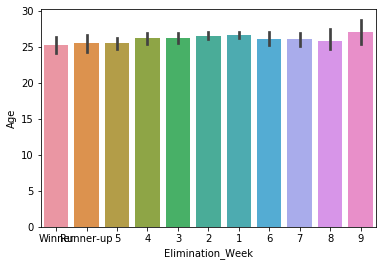

In [81]:
# Looking At Age
df['Age'].mean()

df.loc[df.Elimination_Week== 'Winner', 'Age'].mean()
#sns.jointplot(x='Elimination_Week', y='Age', data=df)

sns.barplot(x='Elimination_Week', y='Age', data=df)


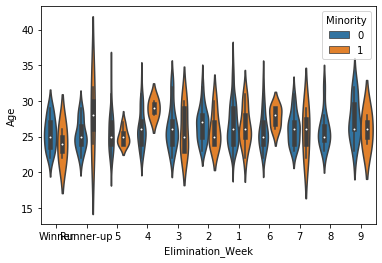

In [68]:
sns.violinplot(x='Elimination_Week', y='Age', data=df, hue='Minority')

In [82]:
# Characterizing the First Impression Rose- who is more likely to get it
df['Age'].mean()

df.loc[df.First_Impression_Rose == 1, 'Age'].mean()
df.loc[df.First_Impression_Rose == 1, 'Hometown']
#sns.jointplot(x='Elimination_Week', y='Age', data=df)

110    Folly Beach, South Carolina
128                Wichita, Kansas
154             Niceville, Florida
185          Blue Island, Illinois
203                Newberg, Oregon
237        Ellerbe, North Carolina
258       Newcastle, Washington[b]
287              Las Vegas, Nevada
313                Ottawa, Ontario
340        Wolcott Mills, Michigan
372              Bristol, Virginia
400                  Dallas, Texas
430          South Portland, Maine
453                Hoover, Alabama
Name: Hometown, dtype: object

In [84]:
import plotly.express as px


ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num'] but received: Hometown

In [83]:

for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total exports'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

ValueError: could not convert string to float: 'Winner'